# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [132]:
#%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\esimonds\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [146]:
#%pip install --upgrade seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\esimonds\Anaconda3\python.exe -m pip install --upgrade pip' command.


### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.__version__)

0.11.1


### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [5]:
df_data.sort_values("year", ascending=True)

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
951  2020   Chemistry               The Nobel Prize in Chemistry 2020   
950  2020   Chemistry               The Nobel Prize in Chemistry 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
954  2020  Literature              The Nobel Prize in Literature 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
951  “for the development of a method for genome ed...         1/2   
950  “for the development of a method for genome ed...         1/2   
960  “for the discovery of a supermassive compact o...         1/4   
954  “for her unmistakable poetic voice that with a...         1/1   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
951    Individual            Jennifer A. Doudna  1964-02-19   
950    Individual        Emmanuelle Charpentier  1968-12-11   
960    Individual               Reinhard Genzel  1952-03-24   
954    Individual                  Louise Glück  1943-04-22   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
951            Washington, DC  United States of America   
950           Juvisy-sur-Orge                    France   
960  Bad Homburg vor der Höhe                   Germany   
954              New York, NY  United States of America   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
951  United States of America  Female  University of California   
950                    France  Female       Max-Planck-Institut   
960                   Germany    Male  University of California   
954  United States of America  Female                       NaN   
961            United Kingdom    Male      University of Oxford   

    organization

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [6]:
na_data = df_data[df_data.isna()]
df_data.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date  \
957    Individual            Michael Houghton  1949-07-02   
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

### Check for NaN Values

In [7]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [8]:
# df_data["year"] = pd.to_datetime(df_data["year"])
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

#### Add a Column with the Prize Share as a Percentage

In [9]:
df_data["share_pct"] = df_data["prize_share"].apply(lambda x: float(x[0]) / float(x[2]) *100)

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [11]:
prize_by_sex = df_data["sex"].value_counts()
print(prize_by_sex)

Male      876
Female     58
Name: sex, dtype: int64


In [12]:
fig = px.pie(prize_by_sex,
             values=prize_by_sex,
             names=prize_by_sex.index,
            hole=0.4)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [13]:
df_data[df_data["sex"] == "Female"].sort_values("year")[["category", "full_name", "birth_country"]][:3]

category                                          full_name  \
18     Physics                        Marie Curie, née Sklodowska   
29       Peace  Baroness Bertha Sophie Felicita von Suttner, n...   
51  Literature                      Selma Ottilia Lovisa Lagerlöf   

                       birth_country  
18           Russian Empire (Poland)  
29  Austrian Empire (Czech Republic)  
51                            Sweden

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [14]:
df_data["full_name"].value_counts()[:6]

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Name: full_name, dtype: int64

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [15]:
prize_categories = df_data["category"].value_counts()

In [16]:
bar = px.bar(prize_categories, 
             x=prize_categories.index,
             y=prize_categories.values,
            color=prize_categories.values,
            color_continuous_scale="Aggrnyl")
bar.update_layout(xaxis_title="Prize Categories",
                 yaxis_title="Prizes awarded",
                 coloraxis_showscale=False)
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [17]:
econ_data = df_data[df_data["category"] == "Economics"].sort_values("year")

In [18]:
econ_data[econ_data["full_name"] == "Jan Tinbergen"]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  share_pct  
393         Rotterdam          Netherlands  NLD      50.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [19]:
cat_men_women = df_data.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})
cat_men_women.sort_values("prize", ascending=False, inplace=True)
cat_men_women[:5]

category   sex  prize
11     Physics  Male    212
7     Medicine  Male    210
1    Chemistry  Male    179
5   Literature  Male    101
9        Peace  Male     90

In [20]:
bar2 = px.bar(cat_men_women,
              x=cat_men_women["category"],
              y=cat_men_women["prize"],
             color=cat_men_women["sex"])
bar2.update_layout(xaxis_title="Categories",
                  yaxis_title="Number of prizes")
bar2.show()




# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [21]:
prize_per_year = df_data.groupby("year").count()["prize"]
prize_per_year[:5]

year
1901    6
1902    7
1903    7
1904    6
1905    5
Name: prize, dtype: int64

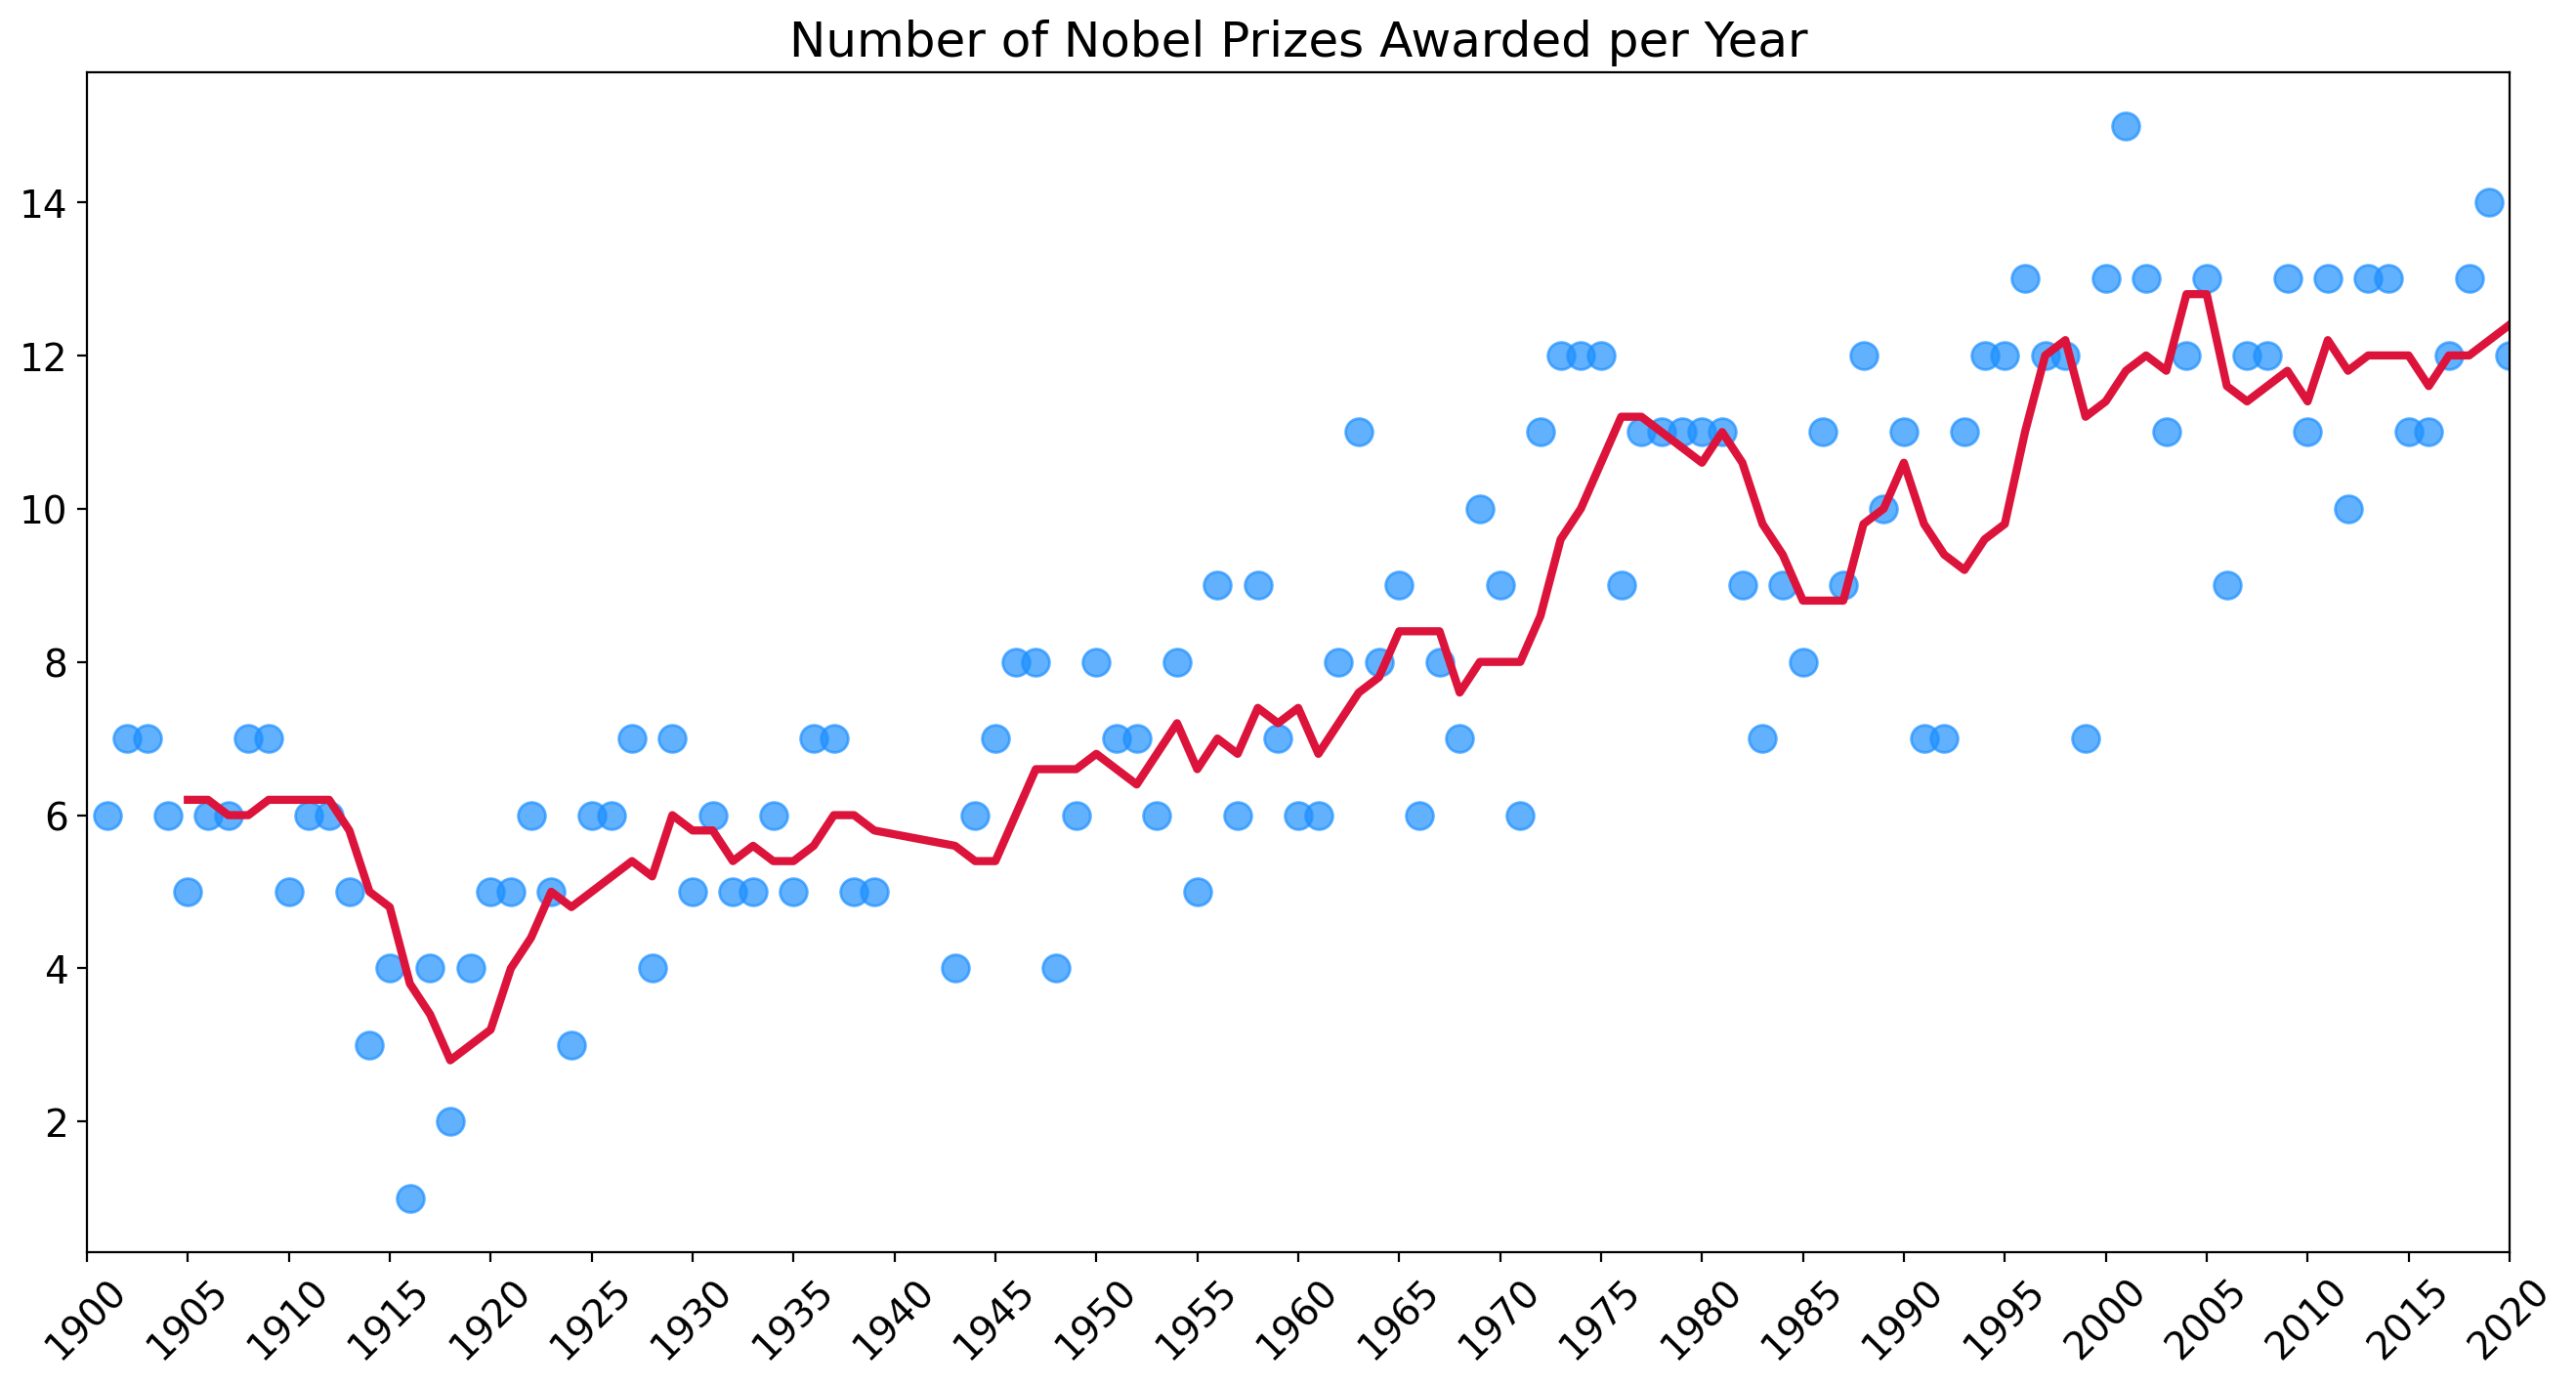

In [22]:
roll_df = prize_per_year.rolling(window=5).mean()
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index,
                 y=prize_per_year.values,
                 c="dodgerblue",
                  alpha=0.7,
                  s=100)
ax.plot(prize_per_year.index,
        roll_df.values,
        c="crimson",
        linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [23]:
prize_share_per_year = df_data.groupby('year').agg({'share_pct': pd.Series.mean})

In [24]:
roll_df2 = prize_share_per_year.rolling(window=5).mean()

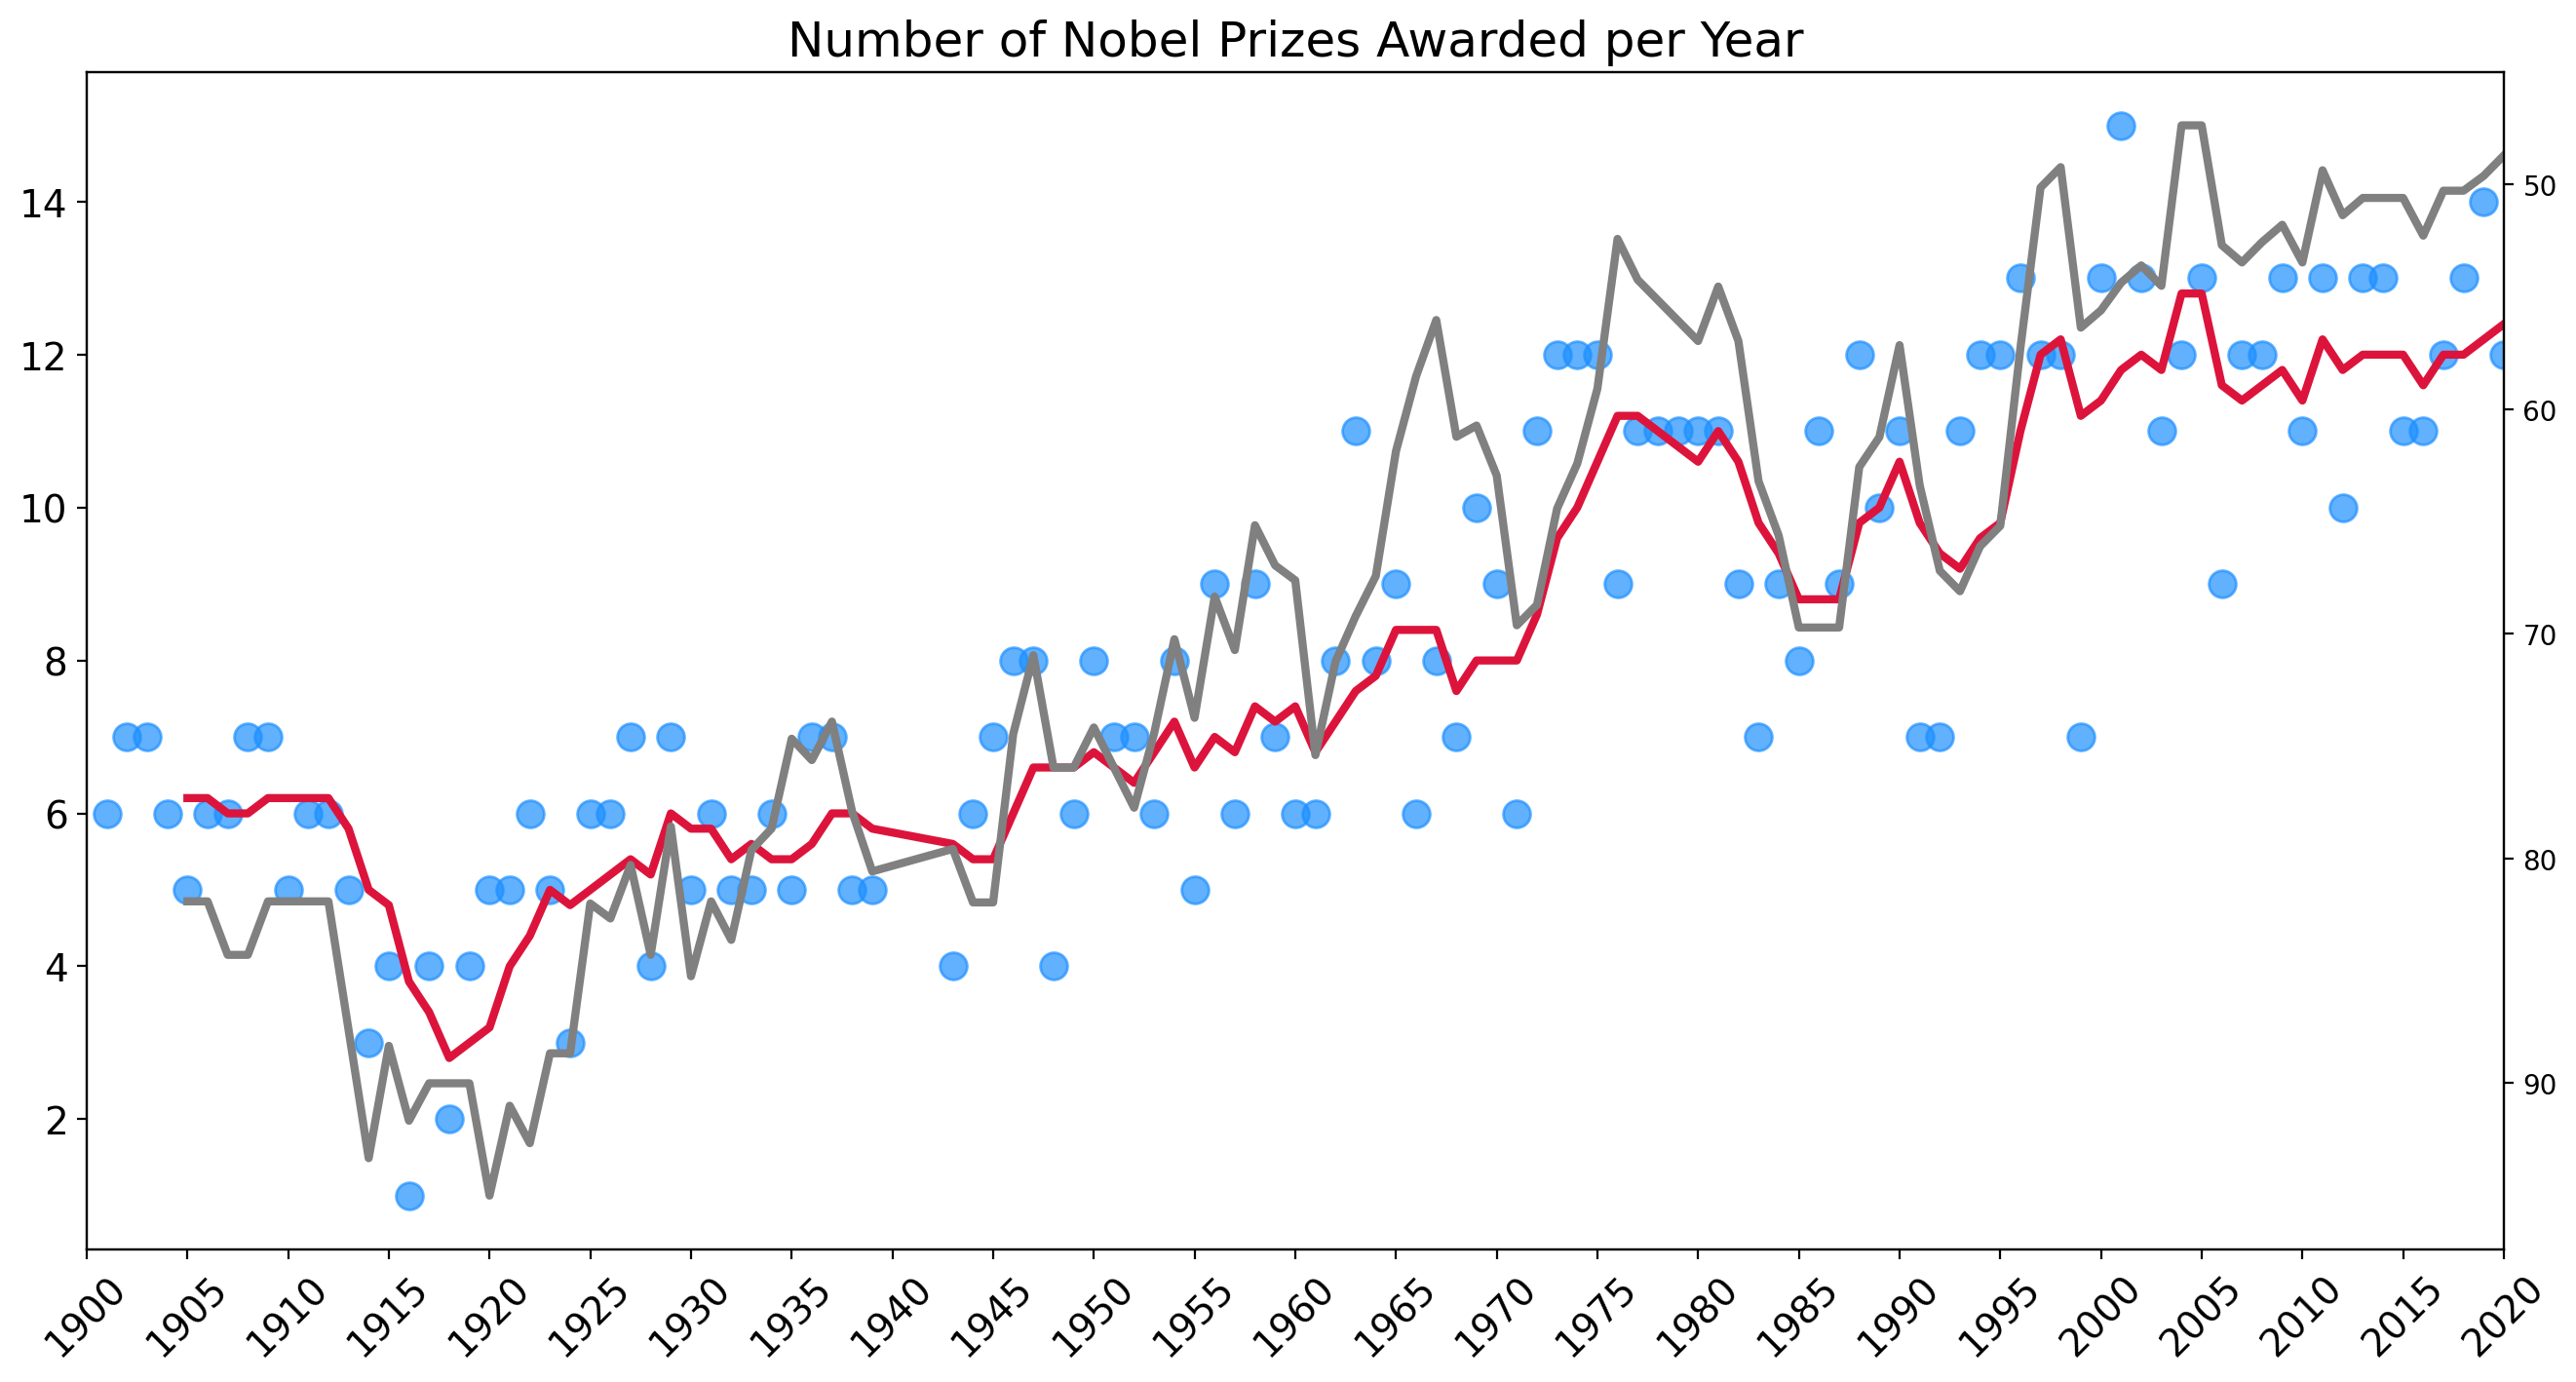

In [25]:
roll_df = prize_per_year.rolling(window=5).mean()
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

ax1 = plt.gca()
ax1.set_xlim(1900, 2020)
ax2 = ax1.twinx()
ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index,
                 y=prize_per_year.values,
                 c="dodgerblue",
                  alpha=0.7,
                  s=100)
ax1.plot(prize_per_year.index,
        roll_df.values,
        c="crimson",
        linewidth=3)
ax2.plot(prize_share_per_year.index,
        roll_df2.values,
        c="grey",
        linewidth=3)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [26]:
top20_countries = df_data.groupby("birth_country_current", as_index=False).agg({"prize": pd.Series.count}).sort_values("prize", ascending=True)[-20:]
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [27]:
bar = px.bar(top20_countries,
            x=top20_countries["prize"],
            y=top20_countries["birth_country_current"],
            orientation="h",
            color=top20_countries["prize"],
            color_continuous_scale="viridis")
bar.update_layout(xaxis_title="Number of Prizes",
                 yaxis_title="Countries",
                 coloraxis_showscale=False)

bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [28]:
iso_df = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg(
{"prize": pd.Series.count}).sort_values('prize')
iso_df

birth_country_current  ISO  prize
78                  Zimbabwe  ZWE      1
77                     Yemen  YEM      1
32                   Iceland  ISL      1
41                     Kenya  KEN      1
29         Guadeloupe Island  GLP      1
..                       ...  ...    ...
67                    Sweden  SWE     29
25                    France  FRA     57
26                   Germany  DEU     84
73            United Kingdom  GBR    105
74  United States of America  USA    281

[79 rows x 3 columns]

In [29]:
world_map = px.choropleth(iso_df, 
                         locations="ISO",
                         color="prize",
                         hover_name="birth_country_current",
                         color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [30]:
country_cat_df = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})


In [31]:
country_cat_df.sort_values("prize", ascending=False, inplace=True)

In [32]:
merge_df = pd.merge(country_cat_df, top20_countries, on=["birth_country_current"])
merge_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]

In [33]:
merge_df.sort_values("total_prize", inplace=True)

In [34]:
new_bar = px.bar(
                x=merge_df["cat_prize"],
                y=merge_df["birth_country_current"],
                color=merge_df["category"],
                orientation="h")
new_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [35]:
yearly_prizes = df_data.groupby(["birth_country_current", "year"], as_index=False).count()
yearly_prizes = yearly_prizes.sort_values("year")[['year', "birth_country_current", "prize"]]
cumulative_prizes = yearly_prizes.groupby(["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()

In [36]:
cumulative_prizes.reset_index(inplace=True)

In [37]:
l_chart = px.line(cumulative_prizes,
                 x="year",
                 y="prize",
                 color="birth_country_current",
                 hover_name="birth_country_current")

l_chart.update_layout(xaxis_title="Year",
                     yaxis_title="Number of Prizes")

l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [38]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD     100.00  
1               NaN                  NaN  FRA     100.00  
2           Marburg              Germany  POL     100.00  
3               NaN                  NaN  FRA      50.00  
4               NaN                  NaN  CHE      50.00

In [39]:
org_data = df_data.groupby("organization_name", as_index=False).agg({"prize": pd.Series.count})
org_data.sort_values("prize", ascending=True, inplace=True)

In [40]:
bar = px.bar(x=org_data["prize"][-20:],
            y=org_data["organization_name"][-20:],
            color=org_data["prize"][-20:],
            color_continuous_scale="viridis",
            orientation="h")

bar.update_layout(xaxis_title="Nobel Prize Winners",
                 yaxis_title="Universities",
                 coloraxis_showscale=False)
bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [43]:
city_df = df_data["organization_city"].value_counts()[:20]
city_df.sort_values(ascending=True, inplace=True)

In [44]:
bar = px.bar(x=city_df.values,
            y=city_df.index,
            color=city_df.values,
            color_continuous_scale="viridis",
            orientation="h")

bar.update_layout(xaxis_title="Nobel Prize Winners",
                 yaxis_title="Universities",
                 coloraxis_showscale=False)
bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [72]:
birth_city_df = df_data["birth_city"].value_counts()[:20]
birth_city_df.sort_values(ascending=True, inplace=True)

In [73]:
bc_bar = px.bar(x=birth_city_df.values,
                y=birth_city_df.index,
               color=birth_city_df.values,
                orientation="h",
                color_continuous_scale=px.colors.sequential.Plasma)

bc_bar.update_layout(xaxis_title="Birth Cities of winners",
                    yaxis_title="Number of Winners per City",
                    coloraxis_showscale=False)
bc_bar.show()

In [67]:
percent_city = df_data.groupby(["birth_city", "birth_country"], as_index=False).count()
percent_city = percent_city.sort_values("prize")[["birth_city", "birth_country", "prize"]]
cumulative_city = percent_city.groupby(["birth_city", "birth_country"]).sum().groupby(level=[0]).cumsum()
cumulative_city.sort_values("prize", ascending=False)[]

prize
birth_city   birth_country                    
New York, NY United States of America       53
Paris        France                         26
London       United Kingdom                 19
Vienna       Austrian Empire (Austria)      14
Chicago, IL  United States of America       12
...                                        ...
Houston, TX  United States of America        1
Hsinchu      Taiwan                          1
Hume, IL     United States of America        1
Hämeenkyrö   Russian Empire (Finland)        1
Šeteniai     Russian Empire (Lithuania)      1

[647 rows x 1 columns]

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [92]:
prize_by_org = df_data.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).agg({"prize": pd.Series.count})

In [93]:
prize_by_org.sort_values("prize", ascending=False, inplace=True)
prize_by_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [94]:
fig = px.sunburst(prize_by_org,
                  path=prize_by_org[["organization_country", "organization_city", "organization_name"]],
                  values=prize_by_org["prize"])
fig.show()

In [41]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [42]:
birth_years = df_data["birth_date"].dt.year

In [43]:
df_data["winning_age"] = df_data["year"] - birth_years

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [44]:
display(df_data.nlargest(n=1, columns="winning_age"))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU      33.33        97.00

In [45]:
display(df_data.nsmallest(n=1, columns="winning_age"))

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK      50.00        17.00

In [46]:
df_data["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

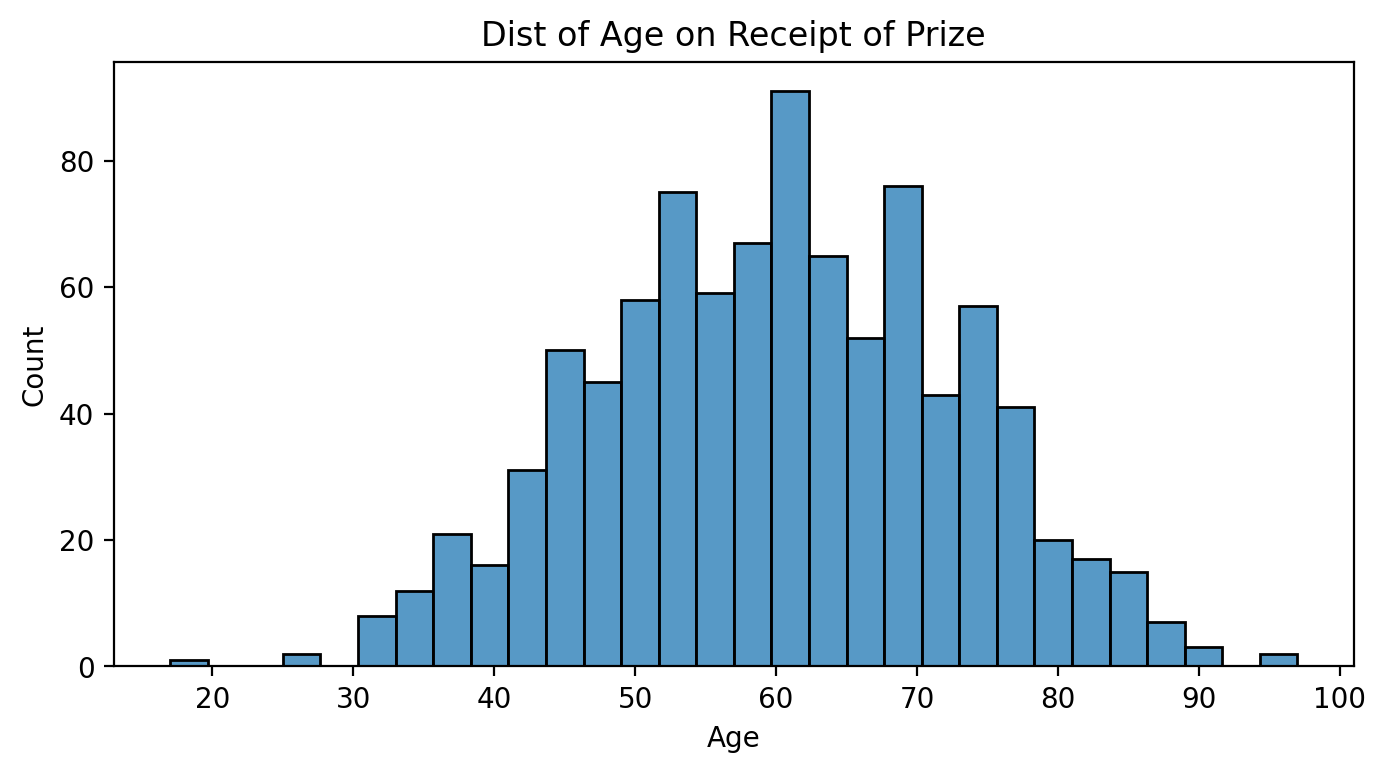

In [54]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data = df_data,
            x=df_data["winning_age"],
            bins=30)
plt.xlabel("Age")
plt.title("Dist of Age on Receipt of Prize")
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


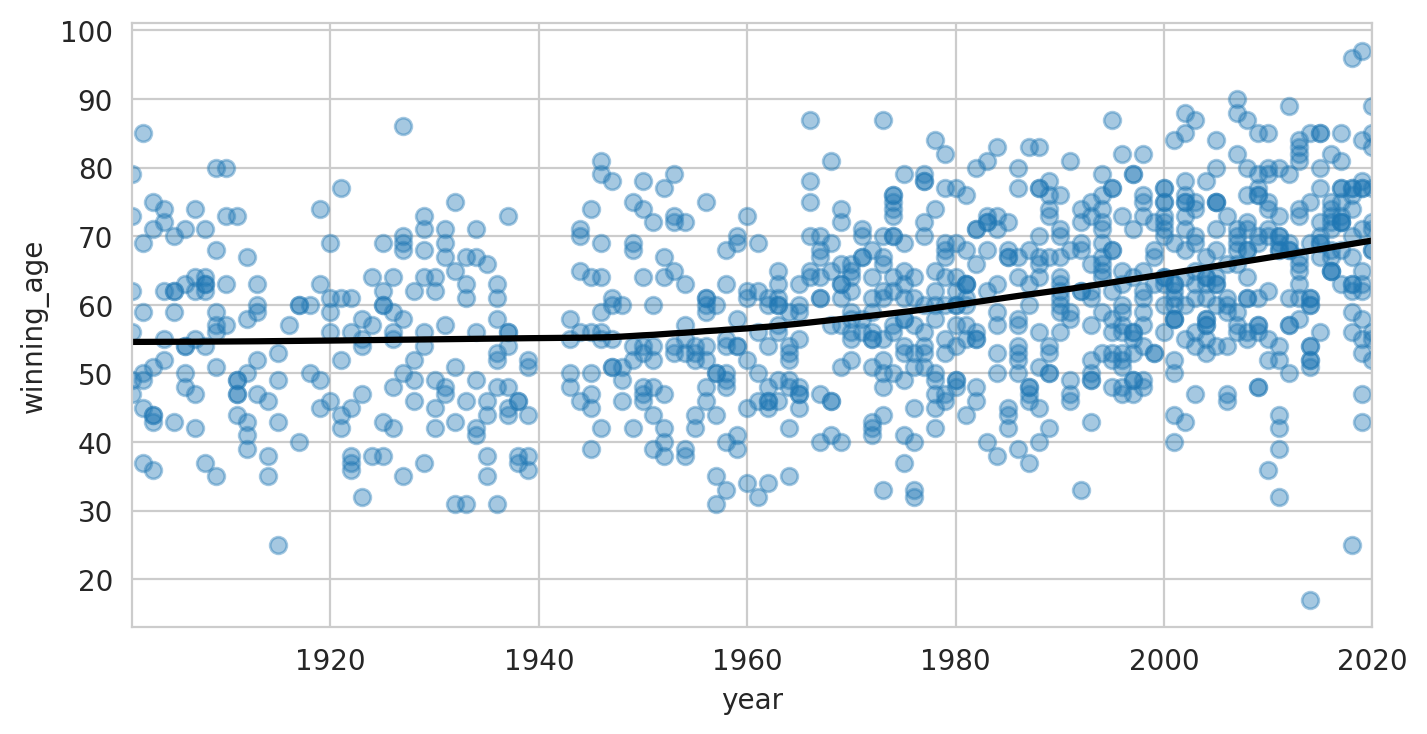

In [57]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
       x="year",
       y="winning_age",
       lowess=True,
       scatter_kws={"alpha": 0.4},
       line_kws={"color": "black"})

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

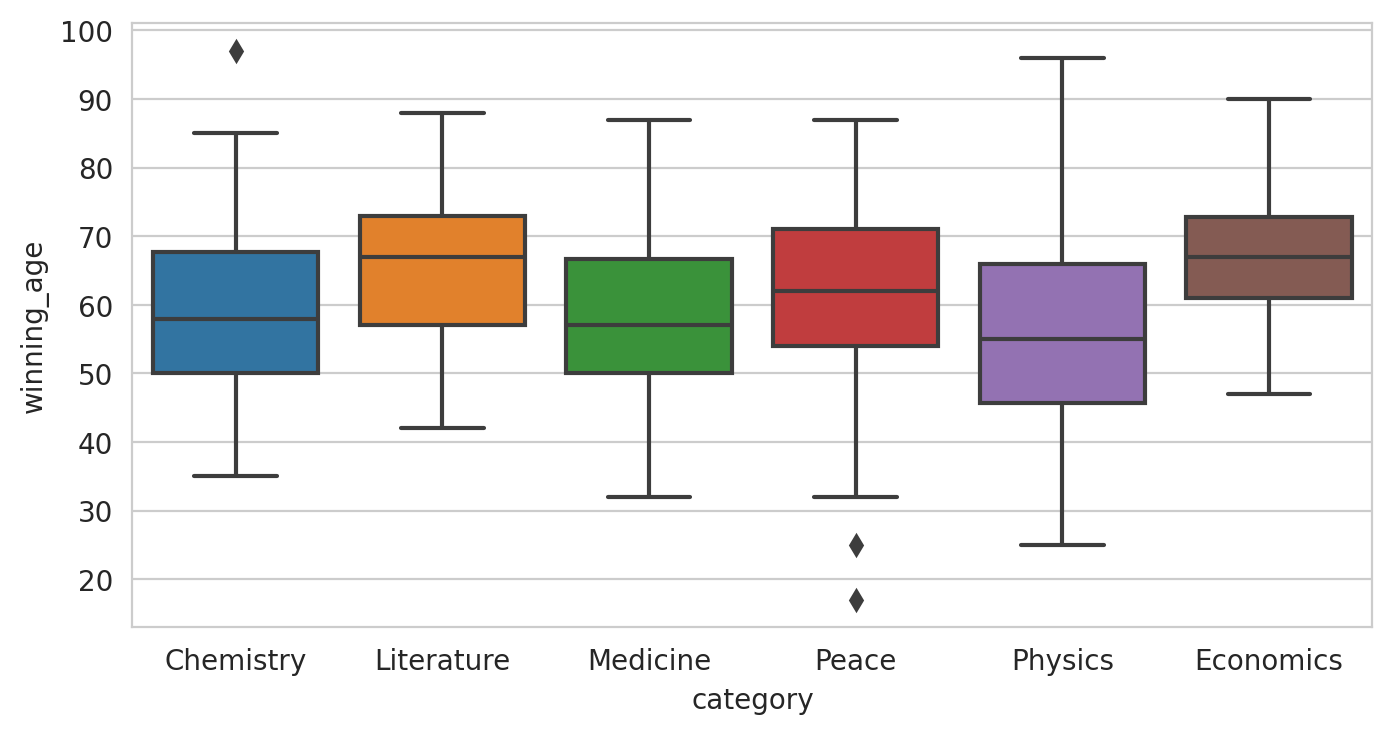

In [58]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
               x="category",
               y="winning_age")
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 3200x800 with 0 Axes>

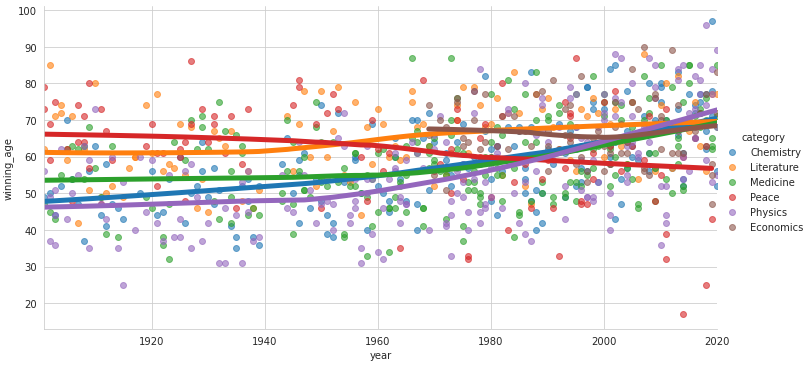

In [72]:
plt.figure(figsize=(16, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                    x="year",
                    hue="category",
                    y="winning_age",
                    lowess=True,
                   aspect=2,
                    scatter_kws={"alpha": 0.6},
                      line_kws={"linewidth": 5})
plt.show()